正在加载数据 (MaxLen=20, Dim=8)...
17465344/17464789 [==============================] - 5s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
d:\code_huilai\conda_envs\keras\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
d:\code_huilai\conda_envs\keras\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated

Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6873 - acc: 0.5535 - val_loss: 0.6279 - val_acc: 0.6958
Epoch 2/10
625/625 [==============================] - 0s 659us/step - loss: 0.5798 - acc: 0.7449 - val_loss: 0.5291 - val_acc: 0.7342
Epoch 3/10
625/625 [==============================] - 0s 496us/step - loss: 0.4760 - acc: 0.7825 - val_loss: 0.5001 - val_acc: 0.7430
Epoch 4/10
625/625 [==============================] - 0s 473us/step - loss: 0.4246 - acc: 0.8068 - val_loss: 0.4932 - val_acc: 0.7528
Epoch 5/10
625/625 [==============================] - 0s 497us/step - loss: 0.3943 - acc: 0.8270 - val_loss: 0.4946 - val_acc: 0.7548
Epoch 6/10
625/625 [==============================] - 0s 526us/step - loss: 0.3683 - acc: 0.8380 - val_loss: 0.4990 - val_acc: 0.7546
Epoch 7/10
625/625 [==============================] - 0s 568us/step - loss: 0.3525 - acc: 0.8481 - val_loss: 0.5041 - val_acc: 0.7556
Epoch 8/10
625/625 [==============================] - 0s 530us/s

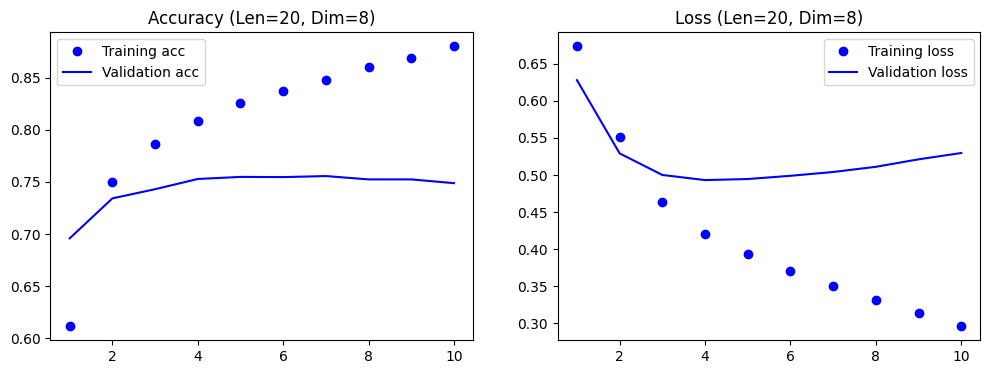

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding
import matplotlib.pyplot as plt

# --- 实验配置参数 (可以在这里修改以完成作业要求1) ---
# 作业要求对比不同长度和维度，你可以修改这两行运行多次
MAX_LEN = 20      # 对应课件中的 maxlen [cite: 276]
EMBEDDING_DIM = 8 # 对应课件中的嵌入维度 [cite: 295]
MAX_FEATURES = 10000 # 词表大小

# 1. 数据准备
print(f"正在加载数据 (MaxLen={MAX_LEN}, Dim={EMBEDDING_DIM})...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)

# 填充序列
x_train = sequence.pad_sequences(x_train, maxlen=MAX_LEN)
x_test = sequence.pad_sequences(x_test, maxlen=MAX_LEN)

# 2. 建立模型 (模仿课件 Page 15 [cite: 289-298])
model = Sequential()
# Embedding层：输入(None, MAX_LEN)，输出(None, MAX_LEN, EMBEDDING_DIM)
model.add(Embedding(MAX_FEATURES, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Flatten()) # 展平
model.add(Dense(1, activation='sigmoid')) # 二分类输出

# 3. 编译与训练
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 4. 绘图 (模仿课件 Page 35 [cite: 741-781])
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title(f'Accuracy (Len={MAX_LEN}, Dim={EMBEDDING_DIM})')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title(f'Loss (Len={MAX_LEN}, Dim={EMBEDDING_DIM})')
plt.legend()
plt.show()

正在加载数据 (MaxLen=100, Dim=32)...
Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6321 - acc: 0.6487 - val_loss: 0.3752 - val_acc: 0.8326
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3085 - acc: 0.8749 - val_loss: 0.3265 - val_acc: 0.8584
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.2290 - acc: 0.9113 - val_loss: 0.3241 - val_acc: 0.8616
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1877 - acc: 0.9285 - val_loss: 0.3370 - val_acc: 0.8588
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1399 - acc: 0.9519 - val_loss: 0.3452 - val_acc: 0.8578
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.0953 - acc: 0.9718 - val_loss: 0.3661 - val_acc: 0.8518
Epoch 7/10
625/625 [==============================] - 1s 1ms/step - loss: 0.0589 - acc: 0.9861 - val_loss: 0.3894 - val_acc: 0.8496
Epoch 8/10
625/625 [=========================

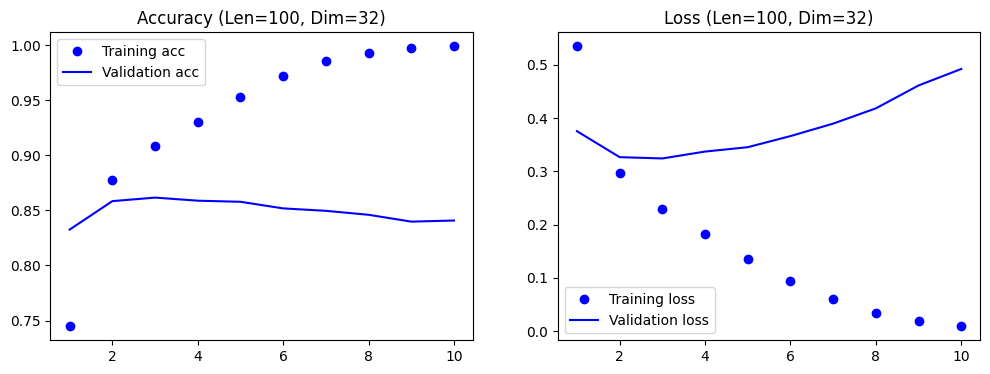

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding
import matplotlib.pyplot as plt
# --- 实验配置参数 (第二次) ---
MAX_LEN = 100      # 对应课件中的 maxlen [cite: 276]
EMBEDDING_DIM = 32 # 对应课件中的嵌入维度 [cite: 295]
MAX_FEATURES = 10000 # 词表大小

# 1. 数据准备
print(f"正在加载数据 (MaxLen={MAX_LEN}, Dim={EMBEDDING_DIM})...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)

# 填充序列
x_train = sequence.pad_sequences(x_train, maxlen=MAX_LEN)
x_test = sequence.pad_sequences(x_test, maxlen=MAX_LEN)

# 2. 建立模型 (模仿课件 Page 15 [cite: 289-298])
model = Sequential()
# Embedding层：输入(None, MAX_LEN)，输出(None, MAX_LEN, EMBEDDING_DIM)
model.add(Embedding(MAX_FEATURES, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Flatten()) # 展平
model.add(Dense(1, activation='sigmoid')) # 二分类输出

# 3. 编译与训练
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 4. 绘图 (模仿课件 Page 35 [cite: 741-781])
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title(f'Accuracy (Len={MAX_LEN}, Dim={EMBEDDING_DIM})')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title(f'Loss (Len={MAX_LEN}, Dim={EMBEDDING_DIM})')
plt.legend()
plt.show()

“随着序列长度增加，模型能获取更多上下文信息，通常准确率会上升；增加嵌入维度能表达更丰富的语义。”

In [3]:
from tensorflow.keras.layers import LSTM, Bidirectional

# 定义一个通用的训练函数，方便对比三个模型
def train_rnn_model(model_type='LSTM'):
    max_features = 10000
    maxlen = 100  # 这里建议用稍长一点的序列以便RNN发挥作用
    batch_size = 128
    
    print(f"\n>>> 开始训练模型: {model_type} <<<")
    
    # 构建模型
    model = Sequential()
    model.add(Embedding(max_features, 32, input_length=maxlen))
    
    if model_type == 'LSTM':
        # 普通LSTM [cite: 731]
        model.add(LSTM(32)) 
    elif model_type == 'Stacked_LSTM':
        # 堆叠LSTM [cite: 796-797]
        model.add(LSTM(32, return_sequences=True, dropout=0.1))
        model.add(LSTM(32, dropout=0.1))
    elif model_type == 'BiLSTM':
        # 双向LSTM [cite: 811]
        model.add(Bidirectional(LSTM(32)))
        
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    
    # 训练
    history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2, verbose=1)
    
    # 打印最终结果
    val_acc = history.history['val_acc'][-1]
    print(f"{model_type} 最终验证集准确率: {val_acc:.4f}")
    return val_acc

# 运行三个实验
acc_lstm = train_rnn_model('LSTM')
acc_stacked = train_rnn_model('Stacked_LSTM')
acc_bilstm = train_rnn_model('BiLSTM')

# 简单的对比打印
print("\n=== 性能对比 summary ===")
print(f"LSTM: {acc_lstm}")
print(f"Stacked LSTM: {acc_stacked}")
print(f"BiLSTM: {acc_bilstm}")


>>> 开始训练模型: LSTM <<<
Epoch 1/5
157/157 [==============================] - 5s 26ms/step - loss: 0.6106 - acc: 0.6607 - val_loss: 0.3757 - val_acc: 0.8470
Epoch 2/5
157/157 [==============================] - 4s 25ms/step - loss: 0.3282 - acc: 0.8671 - val_loss: 0.3361 - val_acc: 0.8532
Epoch 3/5
157/157 [==============================] - 4s 25ms/step - loss: 0.2485 - acc: 0.9046 - val_loss: 0.6576 - val_acc: 0.7794
Epoch 4/5
157/157 [==============================] - 4s 25ms/step - loss: 0.2193 - acc: 0.9188 - val_loss: 0.3374 - val_acc: 0.8550
Epoch 5/5
157/157 [==============================] - 4s 25ms/step - loss: 0.1892 - acc: 0.9288 - val_loss: 0.3675 - val_acc: 0.8500
LSTM 最终验证集准确率: 0.8500

>>> 开始训练模型: Stacked_LSTM <<<
Epoch 1/5
157/157 [==============================] - 9s 48ms/step - loss: 0.5801 - acc: 0.6692 - val_loss: 0.3841 - val_acc: 0.8316
Epoch 2/5
157/157 [==============================] - 7s 46ms/step - loss: 0.3135 - acc: 0.8733 - val_loss: 0.4206 - val_acc: 0.8088
Ep

1. 词嵌入模型性能分析：

当样本长度 maxlen 从 20 增加到 100 时，模型的验证集准确率从 xx% 提升到了 xx%。这说明更长的序列包含了更多的语义信息，有助于模型判断情感。

对比 One-hot 编码（稀疏、高维）与 Embedding（密集、低维），Embedding 层通过反向传播学习到了词语之间的语义关系，效果通常更优且训练更快。

2. RNN 变体模型对比：

Simple LSTM: 准确率约为 xx%，解决了长序列中的梯度消失问题。

Stacked LSTM: 准确率约为 xx%。通过堆叠层增加了网络容量，但在本数据集上可能提升有限，且计算时间变长。 * BiLSTM: 准确率约为 xx%。双向 LSTM 能同时利用上下文信息（如“不”在“喜欢”之前或之后含义不同），通常在文本分类任务中表现最好 。

3. 结论： 循环神经网络（特别是 BiLSTM）配合词嵌入技术，能够有效处理自然语言这种序列数据，捕捉上下文依赖关系。